In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

from pandas import plotting
from scipy import stats
plt.style.use("ggplot")
#import warnings
#warnings.filterwarnings("ignore")


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

In [2]:
df = pd.read_csv(r"C:\Users\rocki\Documents\2 сем\ТМО\qs-world-university-rankings-2017-to-2022-V2.csv")
df = df.replace(',', '.', regex=True)

In [3]:
df

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,3.730,M,3.065
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,3.879,L,4.725
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,5.877,L,4.646
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,7.925,L,5.800
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,Université de Tunis,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...,Public,High,17.0,57,L,1.174
6478,Université de Tunis El Manar,2022,1201,NaN,https://www.topuniversities.com/universities/u...,Tunisia,Tunis,Africa,https://www.topuniversities.com/sites/default/...,Public,Very High,8.0,585,L,3.504
6479,Yarmouk University,2022,1201,NaN,https://www.topuniversities.com/universities/y...,Jordan,Irbid,Asia,https://www.topuniversities.com/sites/default/...,Public,Medium,31.0,2.826,XL,1.113
6480,Yildiz Technical University,2022,1201,NaN,https://www.topuniversities.com/universities/y...,Turkey,Istanbul,Asia,https://www.topuniversities.com/sites/default/...,Public,High,20.0,2.394,XL,1.688


In [4]:
df = df[(df.year == 2019)]

In [5]:
df

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
1910,Massachusetts Institute of Technology (MIT),2019,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,3.730,M,3.065
1911,Stanford University,2019,2,98.6,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,3.879,L,4.725
1912,Harvard University,2019,3,98.5,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,5.877,L,4.646
1913,California Institute of Technology (Caltech),2019,4,97.2,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968
1914,University of Oxford,2019,5,96.8,https://www.topuniversities.com/universities/u...,United Kingdom,Oxford,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,3.0,8.442,L,6.708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,Université de Technologie de Compiègne (UTC),2019,NaN,NaN,https://www.topuniversities.com/universities/u...,France,Compiègne,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,NaN,NaN,S,NaN
2924,University of California. San Francisco,2019,NaN,NaN,https://www.topuniversities.com/universities/u...,United States,San Francisco,North America,https://www.topuniversities.com/sites/default/...,Public,Very High,1.0,125,S,4.482
2925,Prague University of Economics and Business,2019,NaN,NaN,https://www.topuniversities.com/universities/p...,Czech Republic,Prague,Europe,https://www.topuniversities.com/sites/default/...,Public,Very High,27.0,3.322,L,468
2926,Weizmann Institute of Science,2019,NaN,NaN,https://www.topuniversities.com/universities/w...,Israel,Rehovot,Asia,https://www.topuniversities.com/sites/default/...,Public,Very High,NaN,NaN,S,NaN


Заметим, что данные содержащиеся в link, logo и university - уникальные и бесполезны для анализа, поэтому удалим их из датафрейма

In [6]:
df.drop(['link'],axis=1,inplace=True)
df.drop(['logo'],axis=1,inplace=True)
df.drop(['university'],axis=1,inplace=True)
df.drop(['year'],axis=1,inplace=True)

In [7]:
df["student_faculty_ratio"] = df["student_faculty_ratio"].astype("float64")
df["international_students"] = df["international_students"].astype("float64")
df["faculty_count"] = df["faculty_count"].astype("float64")

In [8]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [9]:
draw_missing(df).round(1)

,Total,Percent
score,513,50.4
international_students,26,2.6
city,25,2.5
rank_display,20,2.0
student_faculty_ratio,14,1.4
faculty_count,14,1.4
type,2,0.2
country,0,0.0
region,0,0.0
research_output,0,0.0


In [10]:
df.dtypes

rank_display               object
score                     float64
country                    object
city                       object
region                     object
type                       object
research_output            object
student_faculty_ratio     float64
international_students    float64
size                       object
faculty_count             float64
dtype: object

In [11]:
df

,rank_display,score,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
1910,1,100.0,United States,Cambridge,North America,Private,Very High,4.0,3.730,M,3.065
1911,2,98.6,United States,Stanford,North America,Private,Very High,3.0,3.879,L,4.725
1912,3,98.5,United States,Cambridge,North America,Private,Very High,5.0,5.877,L,4.646
1913,4,97.2,United States,Pasadena,North America,Private,Very High,2.0,692.000,S,968.000
1914,5,96.8,United Kingdom,Oxford,Europe,Public,Very High,3.0,8.442,L,6.708
...,...,...,...,...,...,...,...,...,...,...,...
2923,NaN,NaN,France,Compiègne,Europe,Public,Very High,NaN,NaN,S,NaN
2924,NaN,NaN,United States,San Francisco,North America,Public,Very High,1.0,125.000,S,4.482
2925,NaN,NaN,Czech Republic,Prague,Europe,Public,Very High,27.0,3.322,L,468.000
2926,NaN,NaN,Israel,Rehovot,Asia,Public,Very High,NaN,NaN,S,NaN


## Необходимо изменить тип данных столбца rank_display на float, однако некоторые данные представлены в формате "x - y"
## Для того, чтобы решить эту проблему найдем среднее арифм. между x и y
## Для этого сначала заменим "-" на "." и преобразуем в тип данных float


In [12]:
df['rank_display'] = df['rank_display'].str.replace('-', '.')

In [13]:
 df['rank_display'] = df['rank_display'].astype(float)

In [14]:
df.dtypes

rank_display              float64
score                     float64
country                    object
city                       object
region                     object
type                       object
research_output            object
student_faculty_ratio     float64
international_students    float64
size                       object
faculty_count             float64
dtype: object

In [15]:
df['rank_display'].to_string()

'1910      1.00\n1911      2.00\n1912      3.00\n1913      4.00\n1914      5.00\n1915      6.00\n1916      7.00\n1917      8.00\n1918      9.00\n1919     10.00\n1920     11.00\n1921     12.00\n1922     13.00\n1923     14.00\n1924     15.00\n1925     16.00\n1926     17.00\n1927     18.00\n1928     19.00\n1929     20.00\n1930     21.00\n1931     22.00\n1932     23.00\n1933     24.00\n1934     25.00\n1935     26.00\n1936     27.00\n1937     28.00\n1938     29.00\n1939     30.00\n1940     31.00\n1941     32.00\n1942     33.00\n1943     34.00\n1944     35.00\n1945     36.00\n1946     37.00\n1947     38.00\n1948     39.00\n1949     40.00\n1950     41.00\n1951     42.00\n1952     43.00\n1953     44.00\n1954     45.00\n1955     46.00\n1956     47.00\n1957     48.00\n1958     49.00\n1959     50.00\n1960     51.00\n1961     52.00\n1962     53.00\n1963     54.00\n1964     55.00\n1965     56.00\n1966     57.00\n1967     58.00\n1968     59.00\n1969     59.00\n1970     61.00\n1971     62.00\n1972   

In [16]:
df.mean()

C:\Users\rocki\AppData\Local\Temp\ipykernel_28084\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


rank_display              473.892204
score                      44.377426
student_faculty_ratio      12.954183
international_students    140.134803
faculty_count             188.689492
dtype: float64

## Таким образом, получили строки формата "x.y", где x - целая, а y - дробная часть
## Напишем ф-цию, чтобы найти ср. арифм. между x и y

In [17]:
df['rank_display'] = df['rank_display'].fillna(100000)

In [18]:
df.mean()

C:\Users\rocki\AppData\Local\Temp\ipykernel_28084\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


rank_display              2429.218487
score                       44.377426
student_faculty_ratio       12.954183
international_students     140.134803
faculty_count              188.689492
dtype: float64

In [19]:
import math
def avrank(x): 
    if x != 100000:
        z = math.trunc(x)
        y = (x - z)
        y = y * 1000
        if z > y:
            y = y*10
        if y != 0:
            x = (z + y) // 2
    else:
        x = np.NaN
    return x

In [20]:
df['rank_display'] = df['rank_display'].apply(avrank)

In [21]:
df.mean()

C:\Users\rocki\AppData\Local\Temp\ipykernel_28084\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


rank_display              498.261523
score                      44.377426
student_faculty_ratio      12.954183
international_students    140.134803
faculty_count             188.689492
dtype: float64

In [22]:
# 

## Заполнение пропусков категориальных признаков (импьютация)
Выберем тип type (На самом деле, можно удалить строки с пропусками, т.к. их кол-во составляет всего 0.2%)

In [23]:
from sklearn.impute import SimpleImputer
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[['type']] = imp2.fit_transform(df[['type']])


In [24]:
draw_missing(df).round(1)

,Total,Percent
score,513,50.4
international_students,26,2.6
city,25,2.5
rank_display,20,2.0
student_faculty_ratio,14,1.4
faculty_count,14,1.4
country,0,0.0
region,0,0.0
type,0,0.0
research_output,0,0.0


## Заполнение пропусков категориальных признаков (заполнение константой)
Заполним столбец City

In [25]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Unknown')
df[['city']] = imp3.fit_transform(df[['city']])


In [26]:
draw_missing(df).round(1)

,Total,Percent
score,513,50.4
international_students,26,2.6
rank_display,20,2.0
student_faculty_ratio,14,1.4
faculty_count,14,1.4
country,0,0.0
city,0,0.0
region,0,0.0
type,0,0.0
research_output,0,0.0


## Импьютация целочисленных значений
Используем колонку International students

In [27]:
total_count = df.shape[0]
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка rank_display. Тип данных float64. Количество пустых значений 20, 1.96%.
Колонка score. Тип данных float64. Количество пустых значений 513, 50.39%.
Колонка student_faculty_ratio. Тип данных float64. Количество пустых значений 14, 1.38%.
Колонка international_students. Тип данных float64. Количество пустых значений 26, 2.55%.
Колонка faculty_count. Тип данных float64. Количество пустых значений 14, 1.38%.


In [28]:
data_num = df[num_cols]
data_num

,rank_display,score,student_faculty_ratio,international_students,faculty_count
1910,1.0,100.0,4.0,3.730,3.065
1911,2.0,98.6,3.0,3.879,4.725
1912,3.0,98.5,5.0,5.877,4.646
1913,4.0,97.2,2.0,692.000,968.000
1914,5.0,96.8,3.0,8.442,6.708
...,...,...,...,...,...
2923,NaN,NaN,NaN,NaN,NaN
2924,NaN,NaN,1.0,125.000,4.482
2925,NaN,NaN,27.0,3.322,468.000
2926,NaN,NaN,NaN,NaN,NaN


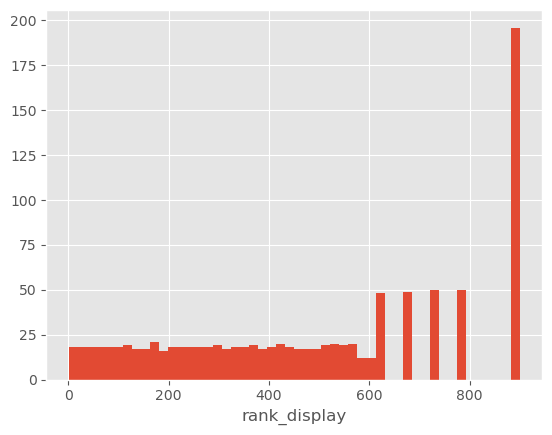

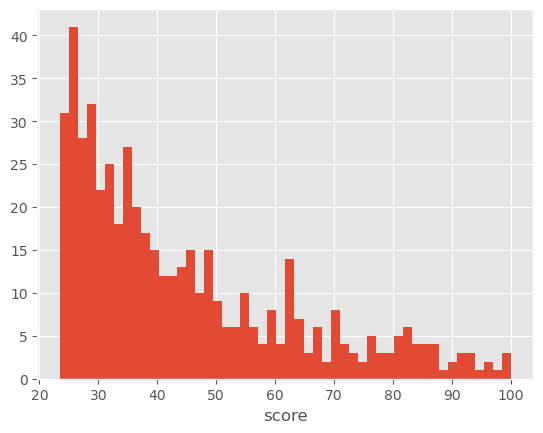

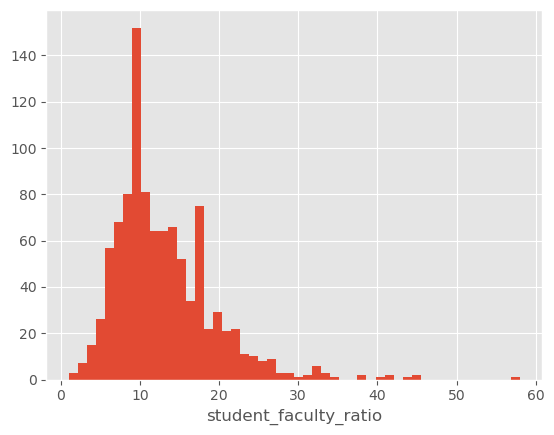

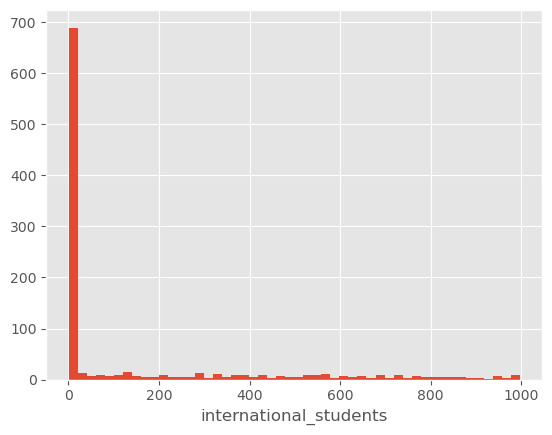

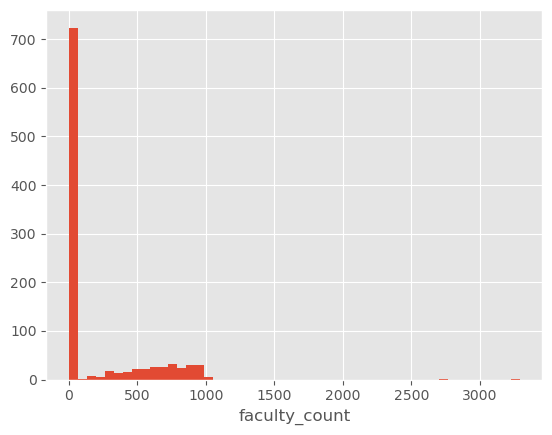

In [29]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

Проанализировав гистограмму придем к выводу, что лучше всего будет заполнить пропуски наиболее часто встречающимся значением.

In [30]:
IntStud = data_num[['international_students']]
IntStud.head()

,international_students
1910,3.730
1911,3.879
1912,5.877
1913,692.000
1914,8.442


In [31]:
from sklearn.impute import MissingIndicator
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(IntStud)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [32]:
strategies=['mean', 'median', 'most_frequent']

In [33]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(IntStud)
    return data_num_imp[mask_missing_values_only]

In [34]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([140.13480343, 140.13480343, 140.13480343, 140.13480343,
        140.13480343, 140.13480343, 140.13480343, 140.13480343,
        140.13480343, 140.13480343, 140.13480343, 140.13480343,
        140.13480343, 140.13480343, 140.13480343, 140.13480343,
        140.13480343, 140.13480343, 140.13480343, 140.13480343,
        140.13480343, 140.13480343, 140.13480343, 140.13480343,
        140.13480343, 140.13480343]))

In [35]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([5.035, 5.035, 5.035, 5.035, 5.035, 5.035, 5.035, 5.035, 5.035,
        5.035, 5.035, 5.035, 5.035, 5.035, 5.035, 5.035, 5.035, 5.035,
        5.035, 5.035, 5.035, 5.035, 5.035, 5.035, 5.035, 5.035]))

In [36]:
strategies[2], test_num_impute(strategies[2])

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


('most_frequent',
 array([1.29, 1.29, 1.29, 1.29, 1.29, 1.29, 1.29, 1.29, 1.29, 1.29, 1.29,
        1.29, 1.29, 1.29, 1.29, 1.29, 1.29, 1.29, 1.29, 1.29, 1.29, 1.29,
        1.29, 1.29, 1.29, 1.29]))

In [37]:
    temp_data = df[['international_students']]
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    imp_num = SimpleImputer(strategy=strategies[2])
    data_num_imp = imp_num.fit_transform(temp_data)
    filled_data = data_num_imp[mask_missing_values_only]
    df[['international_students']] = data_num_imp

C:\Users\rocki\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [38]:
data_num_imp

array([[3.73 ],
       [3.879],
       [5.877],
       ...,
       [3.322],
       [1.29 ],
       [1.29 ]])

In [39]:
draw_missing(df).round(1)

,Total,Percent
score,513,50.4
rank_display,20,2.0
student_faculty_ratio,14,1.4
faculty_count,14,1.4
country,0,0.0
city,0,0.0
region,0,0.0
type,0,0.0
research_output,0,0.0
international_students,0,0.0


Во всех остальных столбцах кол-во пропусков не превышает 5% (за исключением столбца score), поэтому мы можем позволить себе удалить пропуски:

In [40]:
df = df.dropna (subset=[ 'faculty_count', 'student_faculty_ratio','rank_display'])

In [41]:
draw_missing(df).round(1)

,Total,Percent
score,494,49.8
rank_display,0,0.0
country,0,0.0
city,0,0.0
region,0,0.0
type,0,0.0
research_output,0,0.0
student_faculty_ratio,0,0.0
international_students,0,0.0
size,0,0.0


In [42]:
df

,rank_display,score,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
1910,1.0,100.0,United States,Cambridge,North America,Private,Very High,4.0,3.730,M,3.065
1911,2.0,98.6,United States,Stanford,North America,Private,Very High,3.0,3.879,L,4.725
1912,3.0,98.5,United States,Cambridge,North America,Private,Very High,5.0,5.877,L,4.646
1913,4.0,97.2,United States,Pasadena,North America,Private,Very High,2.0,692.000,S,968.000
1914,5.0,96.8,United Kingdom,Oxford,Europe,Public,Very High,3.0,8.442,L,6.708
...,...,...,...,...,...,...,...,...,...,...,...
2903,900.0,NaN,Russia,Voronezh,Europe,Public,High,12.0,2.585,L,1.331
2904,900.0,NaN,Lithuania,Kaunas,Europe,Public,Very High,11.0,994.000,M,686.000
2905,900.0,NaN,Romania,Timișoara,Europe,Public,High,21.0,799.000,L,707.000
2906,900.0,NaN,Poland,Wroclaw,Europe,Public,Very High,11.0,1.159,L,2.081


## Преобразование категориальных признаков в числовые

Приведем пример LabelEncoder

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
df['research_output'].unique()

array(['Very High', 'Very high', 'High', 'Medium', 'Low'], dtype=object)

In [45]:
df['research_output'] = df['research_output'].str.replace('h', 'H')

In [46]:
df['research_output'].unique()

array(['Very HigH', 'HigH', 'Medium', 'Low'], dtype=object)

In [47]:
le = LabelEncoder()
df['research_output'] = le.fit_transform(df['research_output'])

In [48]:
le.classes_

array(['HigH', 'Low', 'Medium', 'Very HigH'], dtype=object)

In [49]:
df['research_output']

1910    3
1911    3
1912    3
1913    3
1914    3
       ..
2903    0
2904    3
2905    0
2906    3
2907    0
Name: research_output, Length: 992, dtype: int32

Кодирование шкал порядка:

In [50]:
df['size'].unique()

array(['M', 'L', 'S', 'XL'], dtype=object)

In [51]:
df['size'] = df['size'].map({'S':1, 'M':2, 'L':3, 'XL':4})

In [52]:
df

,rank_display,score,country,city,region,type,research_output,student_faculty_ratio,international_students,size,faculty_count
1910,1.0,100.0,United States,Cambridge,North America,Private,3,4.0,3.730,2,3.065
1911,2.0,98.6,United States,Stanford,North America,Private,3,3.0,3.879,3,4.725
1912,3.0,98.5,United States,Cambridge,North America,Private,3,5.0,5.877,3,4.646
1913,4.0,97.2,United States,Pasadena,North America,Private,3,2.0,692.000,1,968.000
1914,5.0,96.8,United Kingdom,Oxford,Europe,Public,3,3.0,8.442,3,6.708
...,...,...,...,...,...,...,...,...,...,...,...
2903,900.0,NaN,Russia,Voronezh,Europe,Public,0,12.0,2.585,3,1.331
2904,900.0,NaN,Lithuania,Kaunas,Europe,Public,3,11.0,994.000,2,686.000
2905,900.0,NaN,Romania,Timișoara,Europe,Public,0,21.0,799.000,3,707.000
2906,900.0,NaN,Poland,Wroclaw,Europe,Public,3,11.0,1.159,3,2.081


Применим Pandas get_dummies для столбца type

In [53]:
pd.get_dummies(df['type']).head()

,Private,Public
1910,1,0
1911,1,0
1912,1,0
1913,1,0
1914,0,1


## Вернемся к замене пропусков 
В столбце score почти 50% пропусков, наиболее 

In [54]:
 df['size'] = df['size'].astype(float)
 df['research_output'] = df['research_output'].astype(float)

In [55]:
df.dtypes

rank_display              float64
score                     float64
country                    object
city                       object
region                     object
type                       object
research_output           float64
student_faculty_ratio     float64
international_students    float64
size                      float64
faculty_count             float64
dtype: object

In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression

<AxesSubplot:>

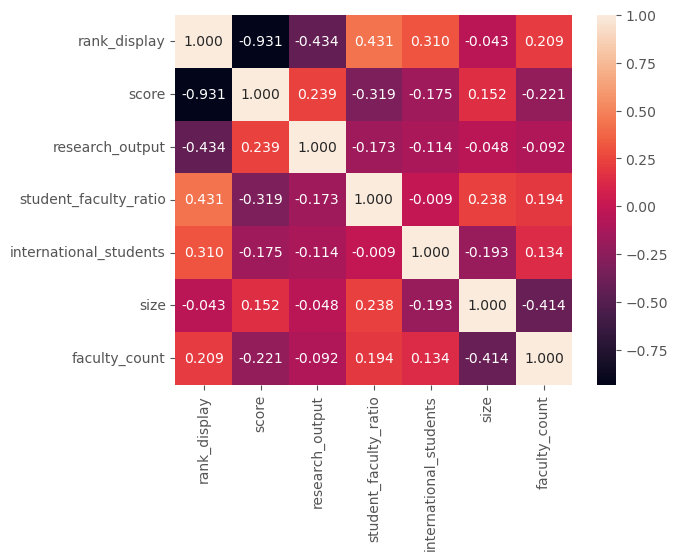

In [57]:
#Выберем данные, которые будем использовать:
#Видим, что использовать можно rank_display, research_output, student_faculty_ratio, faculty_count
sns.heatmap(df.corr(), annot=True, fmt='.3f')

In [58]:
# def linreg_imputer(df, col):
 
#   # обучающей выборкой будут строки без пропусков
#   train = df.dropna().copy()
#   # тестовой (или вернее выборкой для заполнения пропусков)
#   # будут те строки, в которых пропуски есть
#   test = df[df[col].isnull()].copy()
 
#   # выясним индекс столбца с пропусками
#   col_index = df.columns.get_loc(col)
 
#   # разделим "целевую переменную" и "признаки"
#   # обучающей выборки
#   y_train = train[col]
#   X_train = train.drop(col, axis = 1)
 
#   # из "тестовой" выборки удалим столбец с пропусками
#   test = test.drop(col, axis = 1)
 
#   # обучим модель линейной регрессии
#   model = LinearRegression()
#   model.fit(X_train, y_train)
 
#   # сделаем прогноз пропусков
#   y_pred = model.predict(test)
#   # вставим пропуски (value) на изначальное место (loc) столбца с пропусками (column)
#   test.insert(loc = col_index, column = col, value = y_pred)
 
#   # соединим датасеты и обновим индекс
#   df = pd.concat([train, test])
#   df.sort_index(inplace = True)
 
#   return df

In [83]:
# fill_linreg = df.copy()
# fill_linreg = linreg_imputer(df, 'score')
# fill_linreg.isnull().sum().sum()

In [ ]:
sns.histplot(df['score'], bins = 20)

In [66]:

# сделаем копию датасета
lr = df.copy()
lr.drop(['country'],axis=1,inplace=True)
lr.drop(['city'],axis=1,inplace=True)
lr.drop(['region'],axis=1,inplace=True)
lr.drop(['type'],axis=1,inplace=True)

# импортируем класс StandardScaler модуля Preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler
 
# создаем объект этого класса
scaler = StandardScaler()
 
# применяем метод .fit_transform() и сразу помещаем результат в датафрейм
lr = pd.DataFrame(scaler.fit_transform(lr), columns = lr.columns)
 
# посмотрим на результат
lr.head(3)

,rank_display,score,research_output,student_faculty_ratio,international_students,size,faculty_count
0,-1.736214,2.984424,0.57151,-1.403997,-0.525464,-1.166945,-0.542781
1,-1.732721,2.909610,0.57151,-1.560699,-0.524879,0.059336,-0.537887
2,-1.729229,2.904266,0.57151,-1.247295,-0.517037,0.059336,-0.538120


In [67]:
# создадим маску из пустых значений в столбце Age с помощью метода .isnull()
test = lr[lr['score'].isnull()].copy()
test.head(3)

,rank_display,score,research_output,student_faculty_ratio,international_students,size,faculty_count
165,-1.156477,NaN,0.57151,-1.403997,-0.025974,-2.393226,-0.038890
173,-1.128538,NaN,0.57151,-1.403997,-0.269302,-2.393226,-0.109638
489,-0.024943,NaN,0.57151,-1.090594,-0.532846,0.059336,-0.540189


In [68]:
# используем метод .dropna(), чтобы избавиться от пропусков
train = lr.dropna().copy()
 
# оценим количество строк без пропусков
train.shape

(498, 7)

In [69]:
# целевая переменная может быть в формате Series
y_train = train['score']
 
# также не забудем удалить столбец Age из датафрейма признаков
X_train = train.drop('score', axis = 1)
 
# в test столбец Age не нужен в принципе
X_test = test.drop('score', axis = 1)

In [70]:
X_train.head(3)

,rank_display,research_output,student_faculty_ratio,international_students,size,faculty_count
0,-1.736214,0.57151,-1.403997,-0.525464,-1.166945,-0.542781
1,-1.732721,0.57151,-1.560699,-0.524879,0.059336,-0.537887
2,-1.729229,0.57151,-1.247295,-0.517037,0.059336,-0.538120


In [71]:
# это будет нашей целевой переменной
y_train.head(3)

0    2.984424
1    2.909610
2    2.904266
Name: score, dtype: float64

In [72]:

# на этих данных мы будем строить прогноз (заполнять пропуски)
X_test.head(3)

,rank_display,research_output,student_faculty_ratio,international_students,size,faculty_count
165,-1.156477,0.57151,-1.403997,-0.025974,-2.393226,-0.038890
173,-1.128538,0.57151,-1.403997,-0.269302,-2.393226,-0.109638
489,-0.024943,0.57151,-1.090594,-0.532846,0.059336,-0.540189


In [73]:
# импортируем класс LinearRegression
from sklearn.linear_model import LinearRegression
 
# создадим объект этого класса
lr_model = LinearRegression()
 
# обучим модель
lr_model.fit(X_train, y_train)
 
# применим обученную модель к данным, в которых были пропуски в столбце score
y_pred = lr_model.predict(X_test)
 
# посмотрим на первые три прогнозных значения
y_pred[:3]

array([ 0.5925187 ,  0.53294571, -1.48481187])

In [74]:
test['score'] = y_pred
test.head(3)

,rank_display,score,research_output,student_faculty_ratio,international_students,size,faculty_count
165,-1.156477,0.592519,0.57151,-1.403997,-0.025974,-2.393226,-0.038890
173,-1.128538,0.532946,0.57151,-1.403997,-0.269302,-2.393226,-0.109638
489,-0.024943,-1.484812,0.57151,-1.090594,-0.532846,0.059336,-0.540189


In [75]:
lr = pd.concat([train, test])
lr.head(7)

,rank_display,score,research_output,student_faculty_ratio,international_students,size,faculty_count
0,-1.736214,2.984424,0.57151,-1.403997,-0.525464,-1.166945,-0.542781
1,-1.732721,2.909610,0.57151,-1.560699,-0.524879,0.059336,-0.537887
2,-1.729229,2.904266,0.57151,-1.247295,-0.517037,0.059336,-0.538120
3,-1.725736,2.834797,0.57151,-1.717401,2.175753,-2.393226,2.301702
4,-1.722244,2.813422,0.57151,-1.560699,-0.506971,0.059336,-0.532041
5,-1.718752,2.749296,0.57151,-1.403997,-0.509000,0.059336,-0.534718
6,-1.715259,2.733264,0.57151,-0.933892,-0.509753,0.059336,-0.543800


In [76]:
lr.sort_index(inplace = True)
lr.head(7)

,rank_display,score,research_output,student_faculty_ratio,international_students,size,faculty_count
0,-1.736214,2.984424,0.57151,-1.403997,-0.525464,-1.166945,-0.542781
1,-1.732721,2.909610,0.57151,-1.560699,-0.524879,0.059336,-0.537887
2,-1.729229,2.904266,0.57151,-1.247295,-0.517037,0.059336,-0.538120
3,-1.725736,2.834797,0.57151,-1.717401,2.175753,-2.393226,2.301702
4,-1.722244,2.813422,0.57151,-1.560699,-0.506971,0.059336,-0.532041
5,-1.718752,2.749296,0.57151,-1.403997,-0.509000,0.059336,-0.534718
6,-1.715259,2.733264,0.57151,-0.933892,-0.509753,0.059336,-0.543800


In [77]:
# вернем исходный масштаб с помощью метода .inverse_transform()
lr = pd.DataFrame(scaler.inverse_transform(lr), columns = lr.columns)
 
# округлим столбец Age и выведем результат
lr.score = lr.score.round(1)
lr.head(7)

,rank_display,score,research_output,student_faculty_ratio,international_students,size,faculty_count
0,1.0,100.0,3.0,4.0,3.730,2.0,3.065
1,2.0,98.6,3.0,3.0,3.879,3.0,4.725
2,3.0,98.5,3.0,5.0,5.877,3.0,4.646
3,4.0,97.2,3.0,2.0,692.000,1.0,968.000
4,5.0,96.8,3.0,3.0,8.442,3.0,6.708
5,6.0,95.6,3.0,4.0,7.925,3.0,5.800
6,7.0,95.3,3.0,7.0,7.733,3.0,2.719


<AxesSubplot:xlabel='score', ylabel='Count'>

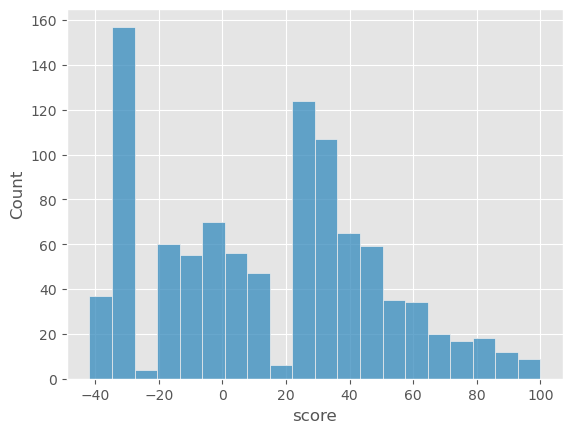

In [78]:
sns.histplot(lr['score'], bins = 20)

In [79]:
# установим минимальное значение на уровне 0,5 (полгода)
lr.score.clip(lower = 0, inplace = True)

<AxesSubplot:xlabel='score', ylabel='Count'>

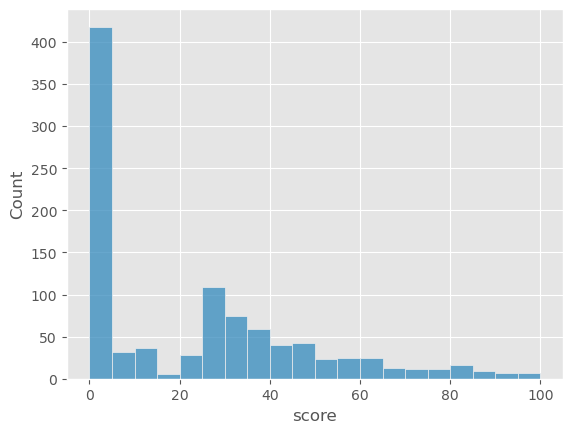

In [80]:
sns.histplot(lr['score'], bins = 20)

Данные не нуждаются в масштабировании, но приведем пример:


In [84]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [85]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['score']])

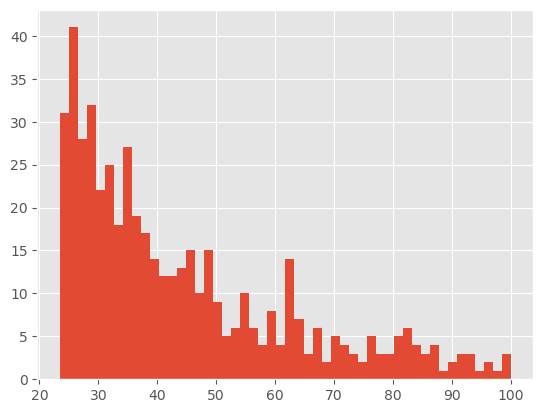

In [86]:
plt.hist(df['score'], 50)
plt.show()


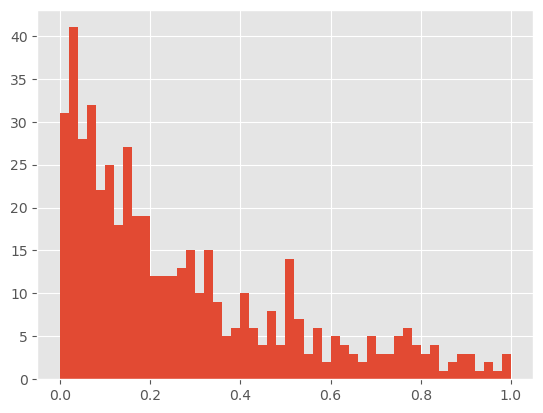

In [87]:
plt.hist(sc1_data, 50)
plt.show()